# Лабораторная работа №5

## Содержание задания

Создать три датасета с «качественными данными», на которых можно обучить простую модель линейной регрессии, например: На одном из этих датасетов обучить модель линейной регрессии. Создать датасет с шумом в данных Провести тестирование работы модели на разных датасетах с использованием Pytest, анализируя качество предсказания, обнаружить проблему на датасете с шумами.

## Импорт необходимых модулей

In [1]:
# Установка ipytest для интеграции pytest с Jupyter
!pip install ipytest


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import ipytest

## Создаем датасет

In [6]:
n_sample = 100
xs = np.linspace(0, 1, n_sample)
ys = xs + np.random.random (n_sample) *0.2-0.1

In [7]:
X_lin = xs.reshape(-1, 1)
y_lin = ys.reshape(-1, 1)

In [8]:
len(X_lin)

100

In [9]:
len(y_lin)

100

## Создание датасета с шумом

In [10]:
noise_level = 0.2  # уровень шума
f_noise_data = np.random.random (int(n_sample*noise_level))
f_noise = f_noise_data.reshape(-1, 1)

# Добавление шума к данным
X_noisy = np.concatenate([X_lin, f_noise], axis=0)
len(X_noisy)

120

In [11]:
# Генерация шума для целевой переменной
target_noise_data = np.random.random (int(n_sample*noise_level))*2  # Больший шум для целевой переменной
target_noise = target_noise_data.reshape(-1, 1)

# Добавление шума к целевой переменной
y_noisy = np.concatenate([y_lin, target_noise], axis=0)
len(y_noisy)

120

## Обучаем модель линейной регрессии на чистых данных

In [12]:
# Разделение данных на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X_lin, y_lin, test_size=0.3, random_state=73)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

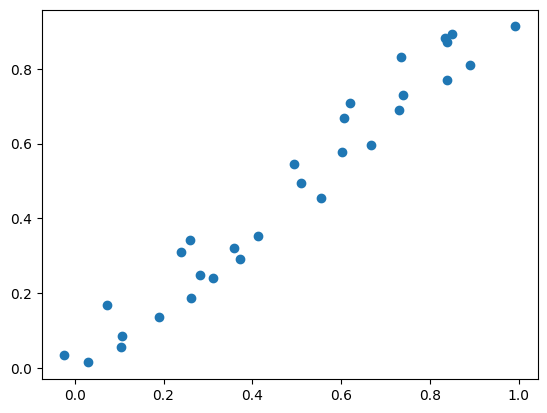

In [14]:
plt. scatter (y_test, y_pred)
plt.show()

In [15]:
# Оценка модели на тестовой выборке
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.003916142012041862


## Написание тестов с использованием pytest

In [16]:
ipytest.autoconfig()

In [17]:
def test_model():
    _, X_test_features, _, y_test_features = train_test_split(X_lin, y_lin, test_size=0.3, random_state=3)
    predict = model.predict(X_test_features)
    mse = mean_squared_error(y_test_features, predict)
    print("MSE :", mse)
    assert mse < 0.005

In [18]:
# проверяем пройдет или нет
ipytest.run('-v')

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0
rootdir: /content
plugins: anyio-3.7.1
collected 1 item

t_7b40468a02134a90b77f0c121e5e14d8.py .                                                      [100%]

======================================== 1 passed in 0.03s =========================================


<ExitCode.OK: 0>

Тест пройден, тк MSE на чистых данных 0.003, а по условиям теста мы поставили < 0.005

In [19]:
def test_model_max():
    _, X_test_noisy_features, _, y_test_noisy_features = train_test_split(X_noisy, y_noisy, test_size=0.3, random_state=3)
    predict = model.predict(X_test_noisy_features)
    mse = mean_squared_error(y_test_noisy_features, predict)
    print("MSE :", mse)
    assert mse < 0.005

In [20]:
ipytest.run('-v')

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0
rootdir: /content
plugins: anyio-3.7.1
collected 2 items

t_7b40468a02134a90b77f0c121e5e14d8.py .F                                                     [100%]

============================================= FAILURES =============================================
__________________________________________ test_model_max __________________________________________

    def test_model_max():
        _, X_test_noisy_features, _, y_test_noisy_features = train_test_split(X_noisy, y_noisy, test_size=0.3, random_state=3)
        predict = model.predict(X_test_noisy_features)
        mse = mean_squared_error(y_test_noisy_features, predict)
        print("MSE :", mse)
>       assert mse < 0.005
E       assert 0.14276456617601496 < 0.005

<ipython-input-19-8b1a13ac04ef>:6: AssertionError
--------------------------------------- Captured stdou

<ExitCode.TESTS_FAILED: 1>

Тест не пройден, тк MSE на зашумленных данных = 0.14, а мы в тесте прописали условие < 0.005